## Preface



First, load relevant dataset:



In [1]:
!pip install CFEdemands
import cfe
import pandas as pd

r = cfe.from_dataset('TanzanianNPS/tanzanian_nps.ds')
r

<xarray.Result>
Dimensions:           (i: 36, j: 13562, k: 8, kp: 8, m: 1, t: 4)
Coordinates:
  * j                 (j) object '0001-001' '0002-001' ... '905012325008102'
  * i                 (i) object 'Beef Including Minced Sausage' ... 'Yams/Cocoyams'
  * k                 (k) object 'C 0-2' 'C 2-5' 'C 6-9' ... 'Women' 'log HSize'
  * kp                (kp) object 'C 0-2' 'C 10-14' ... 'Women' 'log HSize'
  * t                 (t) int32 2008 2010 2012 2014
  * m                 (m) int32 1
Data variables:
    alpha             (i) float64 7.48 6.734 6.482 6.133 ... 4.978 5.052 6.358
    beta              (i) float64 1.213 1.286 1.002 1.239 ... 1.538 0.5749 0.806
    delta             (k, i) float64 ...
    prices            (i, t, m) float64 2.6e+03 3e+03 3.067e+03 ... 1.101 1.25
    characteristics   (k, j, t, m) float64 nan nan 0.0 nan ... nan 0.0 nan nan
    loglambdas        (j, t, m) float64 ...
    a                 (i, t, m) float64 ...
    yhat              float64 ...
    

Also, choose reference prices:



In [39]:
x = 6311 # Budget

# Note selection of prices for 1975 for market A
p = r.prices.sel(t=2014,m=1).copy()

#p.to_dataframe().fillna(1).squeeze()

In [40]:
newp = pd.read_csv('our-prices.csv')
p.values = newp.iloc[:,0].values

And with $(x,p)$ defined we can calculate example demands:



In [41]:
c=r.demands(x,p)
c

i
Beef Including Minced Sausage                               0.668994
Bottled/Canned Soft Drinks (Soda, Juice, Water)             1.638789
Bread                                                       2.045531
Buns, Cakes And Biscuits                                    1.072576
Cassava Fresh                                               4.027293
Chicken And Other Poultry                                   2.441531
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)            4.788496
Coconuts (Mature/Immature)                                  0.999447
Cooking Bananas, Plantains                                  0.657926
Cooking Oil                                                 0.158313
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)          0.267142
Eggs                                                        0.520003
Fresh Fish And Seafood (Including Dagaa)                    0.500396
Fresh Milk                                                  0.942740
Goat Meat                       

Finally, define a function to change a single price in the vector $p$:



In [5]:
def my_prices(p0,p=p,i='Bread'):
    p = p.copy()
    p.loc[i] = p0
    return p

## Mapping to Nutrients



We&rsquo;ve seen how to map prices and budgets into vectors of consumption
quantities using `cfe.Result.demands`.  Next we want to think about
how to map these into bundles of *nutrients*.  The information needed
for the mapping comes from a &ldquo;Food Conversion Table&rdquo; (or database,
such as the [USDA Nutrition DataBase](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md)).   Here we&rsquo;ve adapted (with
thanks to Alessandro Tarozzi of the Universitat Pompeu Fabra) a food
conversion table developed by Gopalan et al (1980) to the foods
reported in the Indian ICRISAT data:



In [6]:
#fct.to_csv('fct.csv')

In [7]:
#fct=pd.read_csv("./TanzanianNPS/_4%2F28 Project 3_ Data (Tanzania) - Food Composition (Raw translati (1).csv",index_col=0)
#fct

fct = pd.read_pickle('./TanzanianNPS/fct.df')
fct=pd.read_csv('fct-full.csv')
fct=fct.set_index('Item name')
fct



,energy kcal,protein g,vit a ug,vit d ug,vit e ug,vit c mg,vit b6 mg,vit b12 ug,ca mg,mg mg,fe mg,zn mg
Item name,,,,,,,,,,,,
Rice (Paddy),358.0,6.5,0.0,0.0,0.0,0.0,0.1,0.0,8.0,36.0,0.6,1.1
Rice (Husked),358.0,6.5,0.0,0.0,0.0,0.0,0.1,0.0,8.0,36.0,0.6,1.1
"Maize (Green, Cob, immature)",59.0,1.8,7.0,0.0,0.0,3.0,0.0,0.0,1.0,18.0,0.3,0.3
"Maize (Grain, dry, raw)",362.0,8.1,0.0,0.0,1.0,0.0,0.3,0.0,6.0,127.0,3.5,1.8
Maize (Flour),362.0,8.1,0.0,0.0,1.0,0.0,0.3,0.0,6.0,127.0,3.5,1.8
Millet and Sorghum (Grain),328.0,6.6,5.0,0.0,0.0,0.0,0.2,0.0,275.0,27.0,2.7,1.2
Millet And Sorghum (Flour),328.0,6.6,5.0,0.0,0.0,0.0,0.2,0.0,275.0,27.0,2.7,1.2
Bread,274.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,27.0,0.5,0.9
"Buns, Cakes And Biscuits",320.0,4.7,34.0,0.0,1.0,0.0,0.0,0.2,38.0,9.0,0.4,0.4


In [8]:
# Change some labels
d={'protein g':'Protein',
   'energy kcal':'Calories',
   'ca mg':'Calcium',
   'mg mg': 'Magnesium',
   'fe mg':'Iron',
   'zn mg':'Zinc',
   'vit a ug':'Vitamin A',
   'vit d ug':'Vitamin D',
   'vit e ug':'Vitamin E',
   'vit c mg':'Vitamin C',
   'vit b6 mg': 'Vitamin B6'}

fct = fct.rename(columns=d)[list(d.values())]
#fct.index = fct.index.droplevel('unit')
fct

,Protein,Calories,Calcium,Magnesium,Iron,Zinc,Vitamin A,Vitamin D,Vitamin E,Vitamin C,Vitamin B6
Item name,,,,,,,,,,,
Rice (Paddy),6.5,358.0,8.0,36.0,0.6,1.1,0.0,0.0,0.0,0.0,0.1
Rice (Husked),6.5,358.0,8.0,36.0,0.6,1.1,0.0,0.0,0.0,0.0,0.1
"Maize (Green, Cob, immature)",1.8,59.0,1.0,18.0,0.3,0.3,7.0,0.0,0.0,3.0,0.0
"Maize (Grain, dry, raw)",8.1,362.0,6.0,127.0,3.5,1.8,0.0,0.0,1.0,0.0,0.3
Maize (Flour),8.1,362.0,6.0,127.0,3.5,1.8,0.0,0.0,1.0,0.0,0.3
Millet and Sorghum (Grain),6.6,328.0,275.0,27.0,2.7,1.2,5.0,0.0,0.0,0.0,0.2
Millet And Sorghum (Flour),6.6,328.0,275.0,27.0,2.7,1.2,5.0,0.0,0.0,0.0,0.2
Bread,8.0,274.0,10.0,27.0,0.5,0.9,0.0,0.0,0.0,0.0,0.0
"Buns, Cakes And Biscuits",4.7,320.0,38.0,9.0,0.4,0.4,34.0,0.0,1.0,0.0,0.0


We need the index of the Food Conversion Table (FCT) to match up with
the index of the vector of quantities demanded.   To manage this we
make use of the `align` method for `pd.DataFrames`:



In [9]:
## code below won't work because food labels of fct and c do not match---- I need help with fixing this :(

In [10]:
# Index of fct includes names of goods and also units.  Drop the latter:
try:
    fct.index = fct.index.droplevel('unit')
except AttributeError: pass # not a multiindex?

# Create a new FCT and vector of consumption that only share rows in common:
fct0, c0= fct.align(c,axis = 0, join='inner')
print(fct0.index)

Index(['Rice (Husked)', 'Maize (Flour)', 'Millet And Sorghum (Flour)', 'Bread',
       'Buns, Cakes And Biscuits', 'Macaroni, Spaghetti', 'Cassava Fresh',
       'Sweet Potatoes', 'Yams/Cocoyams', 'Irish Potatoes',
       'Cooking Bananas, Plantains', 'Sugar', 'Sweets',
       'Honey, Syrups, Jams, Marmalade, Jellies, Canned Fruits',
       'Peas, Beans, Lentils And Other Pulses', 'Groundnuts In Shell/Shelled',
       'Coconuts (Mature/Immature)',
       'Onions, Tomatoes, Carrots And Green Pepper, Other Viungo',
       'Spinach, Cabbage And Other Green Vegetables', 'Ripe Bananas',
       'Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)', 'Sugarcane',
       'Goat Meat', 'Beef Including Minced Sausage',
       'Chicken And Other Poultry', 'Eggs',
       'Fresh Fish And Seafood (Including Dagaa)',
       'Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)', 'Fresh Milk',
       'Milk Products (Like Cream, Cheese, Yoghurt Etc)', 'Cooking Oil',
       'Salt', 'Other Spices', 'Tea Dry',
 

Now, since rows of `fct0` and `c0` match, we can obtain nutritional
outcomes from the inner (or dot, or matrix) product of the transposed
`fct0` and `c0`:



In [11]:
c0

Rice (Husked)                                               3.874077
Maize (Flour)                                               1.089878
Millet And Sorghum (Flour)                                  7.144869
Bread                                                       2.045531
Buns, Cakes And Biscuits                                    1.072576
Macaroni, Spaghetti                                         1.209644
Cassava Fresh                                               4.027293
Sweet Potatoes                                              3.908877
Yams/Cocoyams                                               3.460273
Irish Potatoes                                              3.468331
Cooking Bananas, Plantains                                  0.657926
Sugar                                                       1.118105
Sweets                                                      0.004056
Honey, Syrups, Jams, Marmalade, Jellies, Canned Fruits      0.036490
Peas, Beans, Lentils And Other Pul

In [13]:
import numpy as np
fct0=fct0.replace(np.nan, 0)
fct0

,Protein,Calories,Calcium,Magnesium,Iron,Zinc,Vitamin A,Vitamin D,Vitamin E,Vitamin C,Vitamin B6
Rice (Husked),6.5,358.0,8.0,36.0,0.6,1.1,0.0,0.0,0.0,0.0,0.1
Maize (Flour),8.1,362.0,6.0,127.0,3.5,1.8,0.0,0.0,1.0,0.0,0.3
Millet And Sorghum (Flour),6.6,328.0,275.0,27.0,2.7,1.2,5.0,0.0,0.0,0.0,0.2
Bread,8.0,274.0,10.0,27.0,0.5,0.9,0.0,0.0,0.0,0.0,0.0
"Buns, Cakes And Biscuits",4.7,320.0,38.0,9.0,0.4,0.4,34.0,0.0,1.0,0.0,0.0
"Macaroni, Spaghetti",10.5,371.0,15.0,22.0,1.2,0.1,0.0,0.0,0.0,0.0,0.0
Cassava Fresh,1.4,160.0,16.0,21.0,0.3,0.3,1.0,0.0,0.2,20.6,0.1
Sweet Potatoes,1.2,74.0,20.0,14.0,0.4,0.2,1056.0,0.0,4.0,18.0,0.2
Yams/Cocoyams,2.1,97.0,8.0,26.0,0.8,0.5,0.0,0.0,5.0,12.0,0.2
Irish Potatoes,2.0,93.0,5.0,25.0,0.4,0.3,0.0,0.0,6.7,18.6,0.7


In [14]:
# The @ operator means matrix multiply
N = fct0.T@c0
N

Protein        316.168509
Calories      9903.175587
Calcium       3458.940863
Magnesium     1651.377972
Iron            73.430869
Zinc            42.990242
Vitamin A     7416.951508
Vitamin D       10.164771
Vitamin E       68.424854
Vitamin C      612.007186
Vitamin B6      12.657562
dtype: float64

Of course, since we can compute the nutritional content of a vector of
consumption goods `c0`, we can also use our demand functions to
compute nutrition as a *function* of prices and budget.



In [16]:
def nutrient_demand(x,p):
    c = r.demands(x,p)
    fct0,c0 = fct.align(c,axis=0,join='inner')
    fct0=fct0.replace(np.nan, 0)
    N = fct0.T@c0

    return N


With this `nutrient_demand` function in hand, we can see how nutrient
outcomes vary with budget, given prices:



Text(0, 0.5, 'log nutrient')

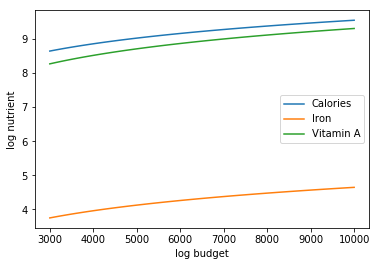

In [52]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(3000,10000,100)

UseNutrients = ['Calories','Iron','Vitamin A']

plt.plot(X,pd.concat({x:np.log(nutrient_demand(x,p))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log budget')
plt.ylabel('log nutrient')

Now how does nutrition vary with prices?



Text(0, 0.5, 'log nutrient')

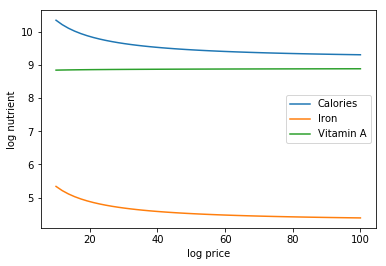

In [55]:
P = np.linspace(10,100,50)

x = 6311

plt.plot(P,pd.concat({p0:np.log(nutrient_demand(x,my_prices(p0,i='Goat Meat')))[UseNutrients] for p0 in P},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log price')
plt.ylabel('log nutrient')

## Nutritional requirements



Individuals have nutritional requirements established by nutrition
scientists.  Here are some standards established by the Indian
National Institute of Nutrition:



### Nutritional needs of individuals



| Sex-Age|Calories|Protein|Fat|Calcium|Iron|Betacarotene|Thiamine|Riboflavin|Niacin|Ascorbic Acid|
|---|---|---|---|---|---|---|---|---|---|---|
| C 0-0.5||||500|||.2|.3||25|
| C 0.5-1|||19|500|5|2800|.3|.4||25|
| C 1-3|1060|16.7|27|600|9|3200|.5|.6|8|40|
| C 4-6|1350|20.1|25|600|13|3200|.7|.8|11|40|
| C 7-9|1690|29.5|30|600|16|4800|.8|1.|13|40|
| B 10-12|2190|39.9|35|800|21|4800|1.1|1.3|15|40|
| G 10-12|2010|40.4|35|800|27|4800|1.|1.2|13|40|
| B 13-15|2750|54.3|45|800|32|4800|1.4|1.6|16|40|
| G 13-15|2330|51.9|40|800|27|4800|1.2|1.4|14|40|
| B 16-17|3020|61.5|50|800|28|4800|1.5|1.8|17|40|
| G 16-17|2440|55.5|35|800|26|4800|1.|1.2|14|40|
| M|2730|60|30|600|17|4800|1.4|1.4|18|40|
| W|2230|55|25|1200|21|4800|1.1|1.3|14|40|



In [24]:
rda = pd.read_csv('hh_rda.csv').set_index(['age'])

#change some labels
d={'child02': 'C 0-2',
   'child25': 'C 2-5',
   'child69': 'C 6-9',
   'child1014':'C 10-14',
   'child1517':'C 15-17',
   'men': 'Men',
   'women': 'Women'}

e={'protein (g)':'Protein',
  # 'fat':'Fat',
   'energy (kcal)':'Calories',
   'calcium (mg)':'Calcium',
   'vitamin a (ug)':'Betacarotene',
   #'thiamine':'Thiamine',
   #'riboflavin':'Riboflavin',
   #'niacin':'Niacin',
   'iron (mg)':'Iron',
   'vitamin c (mg)':'Ascorbic Acid'}

rda = rda.rename(columns=e)[list(e.values())]

rda = rda.rename(index =d)
rda

,Protein,Calories,Calcium,Betacarotene,Iron,Ascorbic Acid
age,,,,,,
C 0-2,13.050000,680,437.50,395833,4.325,28.75
C 2-5,13.800000,900,550.00,400000,5.050,30.00
C 6-9,19.581875,1260,675.00,400000,6.875,33.75
C 10-14,31.471200,1650,840.00,400000,9.220,38.50
C 15-17,42.126000,2020,966.67,400000,10.867,41.67
Men,45.834400,2800,1150.00,600000,9.000,45.00
Women,45.834400,2290,1150.00,500000,20.000,45.00


### Nutritional Needs of Households



Our data on demand and nutrients is at the *household* level; we
   can&rsquo;t directly compare household level nutrition with individual
   level requirements.  What we **can** do is add up minimum individual
   requirements, and see whether household total exceed these.  This
   isn&rsquo;t a guarantee that all individuals have adequate nutrition
   (since the way food is allocated in the household might be quite
   unequal, or unrelated to individual requirements), but it is
   *necessary* if all individuals are to have adequate nutrition.

For the average household in the ICRISAT villages, the number of
different kinds of people can be computed by averaging over households:



In [25]:
# In 1975, averaged over households and villages
zbar = r.z.sel(t=2014).mean(['j','m'])[:-1] # Leave out log HSize
zbar.to_dataframe()

,t,z
k,,
C 0-2,2014,0.351432
C 2-5,2014,0.476730
C 6-9,2014,0.712709
C 10-14,2014,0.635740
C 15-17,2014,0.214200
Men,2014,1.147375
Women,2014,1.319511


There are 1.6 men on average in a household, 1.5 women.

Now, the inner/dot/matrix product between `zbar` and the `rda`
DataFrame of requirements will give us minimum requirements for the
average household:


In [26]:
# This matrix product gives minimum nutrient requirements for average
# household (zbar) in 1975
# add up all the nutrients (rda) needed for a household, such as 1.5 men multiplied by how many nutrients men need
hh_rda = rda.replace('',0).T@zbar
hh_rda

Protein          1.672204e+02
Calories         9.282029e+03
Calcium          4.475033e+03
Betacarotene     2.303040e+06
Iron             5.373313e+01
Ascorbic Acid    1.928711e+02
dtype: float64

## Nutritional Adequacy of Food Demands



Since we can trace out demands for nutrients as a function of $(x,p)$,
and we&rsquo;ve computed minimum nutritional requirements for the average
household, we can *normalize* nutritional intake to check the adequacy
of diet.



In [27]:
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/hh_rda

In terms of normalized nutrients, any household with more than one
unit of any given nutrient (or zero in logs) will be consuming a
minimally adequate level of the nutrient; below this level there&rsquo;s
clearly nutritional inadequacy.  For this reason the ratio of
actual nutrients to required nutrients is termed the &ldquo;nutrient
adequacy ratio,&rdquo; or NAR.



In [38]:
### I think this is the a problem that arose from the problem above... 
X

array([  1.        ,   5.06122449,   9.12244898,  13.18367347,
        17.24489796,  21.30612245,  25.36734694,  29.42857143,
        33.48979592,  37.55102041,  41.6122449 ,  45.67346939,
        49.73469388,  53.79591837,  57.85714286,  61.91836735,
        65.97959184,  70.04081633,  74.10204082,  78.16326531,
        82.2244898 ,  86.28571429,  90.34693878,  94.40816327,
        98.46938776, 102.53061224, 106.59183673, 110.65306122,
       114.71428571, 118.7755102 , 122.83673469, 126.89795918,
       130.95918367, 135.02040816, 139.08163265, 143.14285714,
       147.20408163, 151.26530612, 155.32653061, 159.3877551 ,
       163.44897959, 167.51020408, 171.57142857, 175.63265306,
       179.69387755, 183.75510204, 187.81632653, 191.87755102,
       195.93877551, 200.        ])

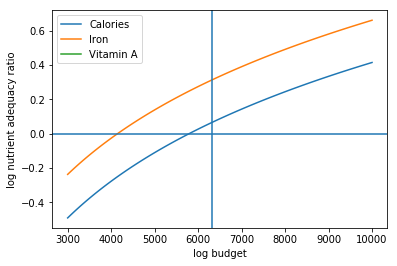

In [48]:
plt.plot(X,pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)
plt.axvline(6311)

NameError: name 'p0' is not defined

As before, we can also vary relative prices.  Here we trace out
nutritional adequacy varying the price of Bengalgram dahl:



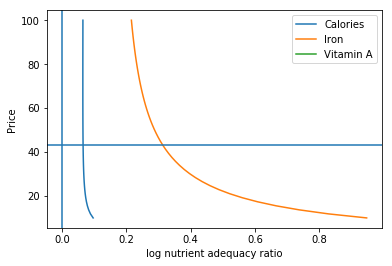

In [59]:
x = 6311


plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(x,my_prices(p0,i='Spinach, Cabbage And Other Green Vegetables')))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients)
plt.ylabel('Price')
plt.xlabel('log nutrient adequacy ratio')
plt.axvline(0)
plt.axhline(p.sel(i='Spinach, Cabbage And Other Green Vegetables').values)

And varying the price of rice:



In [60]:
x = 20
P = np.linspace(0, 150, 50)

plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(x,my_prices(p0,i='Sugarcane')))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients)
plt.ylabel('Price')
plt.xlabel('log NAR')
plt.axvline(0)
plt.axhline(p.sel(i='Sugarcane').values)

[5.0, 10, 15.0] [nan, nan, nan]


/srv/app/venv/lib/python3.6/site-packages/cfe/frischian.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  x=[((alpha[i]/(p[i]*lbda))**beta[i] - phi[i]) for i in range(n)]
/srv/app/venv/lib/python3.6/site-packages/cfe/_core.py:24: RuntimeWarning: invalid value encountered in double_scalars
  d += x[i]*p[i]


AssertionError: Something impossible happened.